Source available on [Nbviewer](http://nbviewer.ipython.org/github/stephanie-w/brainscribble/blob/master/source/classification-algorithms-on-iris-dataset.ipynb).

# Classification Algorithm : Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [129]:
%matplotlib inline

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

## Creating random Data

<matplotlib.colorbar.Colorbar instance at 0x7f7298db8320>

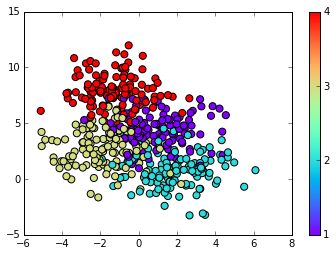

In [130]:
# Define some two-dimensional labeled data
X, y = make_blobs(n_samples=500, centers=4,
                  random_state=0, cluster_std=1.5)
# Plot data X vs X, group by y 
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="rainbow")
plt.colorbar(ticks=np.arange(4), format=plt.FuncFormatter(lambda i, *args: str(i + 1)))

In [131]:
# Create training and testing set (60%-40%)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4)

## Fitting the prediction model

In [132]:
# Fit the model
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')

## Doing predictions

In [133]:
# Predict outcomes from test set
pred = clf.predict(X_test)
pred

array([3, 0, 0, 2, 2, 0, 3, 2, 0, 1, 2, 2, 3, 2, 3, 1, 2, 2, 3, 2, 0, 0, 0,
       0, 1, 0, 1, 2, 1, 2, 0, 2, 3, 2, 0, 2, 2, 0, 1, 3, 1, 0, 0, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 3, 1, 2, 1, 3,
       2, 1, 2, 3, 2, 3, 0, 1, 3, 3, 3, 1, 2, 3, 3, 1, 0, 0, 1, 0, 3, 0, 1,
       0, 3, 3, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 0, 2,
       0, 2, 1, 2, 2, 3, 1, 0, 0, 0, 1, 1, 3, 3, 2, 0, 2, 3, 0, 3, 0, 1, 2,
       2, 2, 2, 2, 3, 1, 1, 0, 2, 0, 3, 0, 1, 3, 3, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 1, 3, 0, 0, 3, 0, 0, 2, 2, 1, 3, 1, 1, 2, 0, 3, 0, 0, 1, 2, 2, 0,
       1, 1, 3, 0, 0, 3, 0, 2, 3, 0, 3, 3, 1, 1, 3, 1])

[[31  8 15  3]
 [ 7 37  2  0]
 [ 9  5 44  1]
 [ 4  0  0 34]]


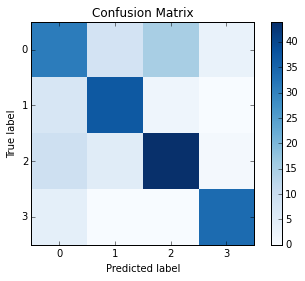

In [134]:
# Compute confusion matrix
cm = confusion_matrix(pred, y_test)
print cm

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
y_val = np.arange(4)
plt.xticks(y_val, y_val)
plt.yticks(y_val, y_val)
plt.colorbar()
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

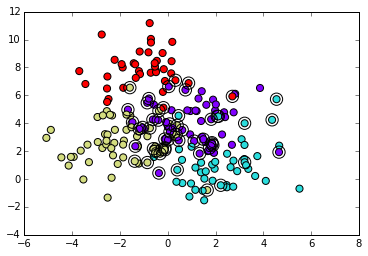

In [135]:
#plt.scatter(X[:,0], X[:,1], c=y, zorder=10, cmap=plt.cm.Paired)
#plt.scatter(X_test[:, 0], X_test[:, 1], c=y, s=80, facecolors='none', zorder=10)

# Plot th prediction results from test set
plt.scatter(X_test[:,0], X_test[:,1], c=pred, s=50, cmap="rainbow")

# Circle out the incorrect predictions
X_wrong = X_test[pred != y_test,:]
plt.scatter(X_wrong[:,0], X_wrong[:,1], s=150, facecolors='none', zorder=10)

(-5.7935534404250326,
 6.7707063165022134,
 -4.1330113827708388,
 12.846278594742767)

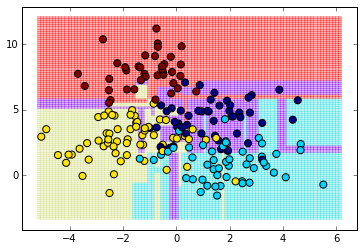

In [136]:
h = 100
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                     np.linspace(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap="rainbow", alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=50)

plt.axis('tight')